- B115129 蔡沐霖
# Similarity 相似度
相似度高 ←→ 距離越短  
  
數學工具 -> pip install scipy

In [1]:
# pipenv install scipy
from scipy import spatial
from math import*
# import numpy as np
# set array
a = [ 5,1,2,3,4,5]
b = [-1,1,2,3,4,5]
w = [ 0.1,0.2,0.15,0.15,0.2,0.2]

### Euclidean Distance 歐式距離
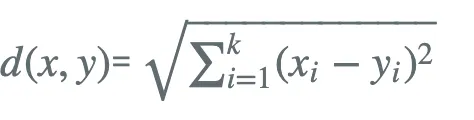 

In [2]:
def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

print("distance:",euclidean_distance(a,b) )

# spatial.distance.euclidean(a,b)

distance: 6.0


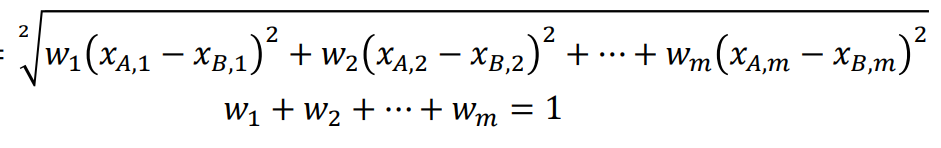

In [3]:
# 加上權重
def euclidean_distance(x,y,w):
  return sqrt(sum( ( w*pow(a-b,2) ) for a, b, w in zip(x, y , w) ))

print("distance:",euclidean_distance(a,b,w) )

distance: 1.8973665961010275


### Manhattan Distance 曼哈頓距離
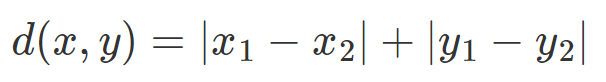

In [4]:
def manhattan_distance(x,y):
  return sum(abs(a-b) for a,b in zip(x,y))

print("distance:",manhattan_distance(a,b) )

# spatial.distance.cityblock(a,b)

distance: 6


### Minkowski Distance 明氏距離 
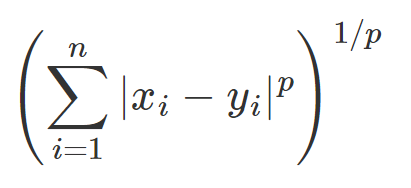
- 當 p=1，為曼哈頓距離
- 當 p=2，為歐式距離

In [5]:
from decimal import Decimal
  
def nth_root(value, n_root):
 root_value = 1/float(n_root)
 return round (Decimal(value) ** Decimal(root_value),3)
  
def minkowski_distance(x,y,p_value):
 return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
print ("distance:",minkowski_distance([0,3,4,5],[7,6,3,-1],3))

# spatial.distance.minkowski(a,b)

distance: 8.373


### Chebyshev distance　切比雪夫距離
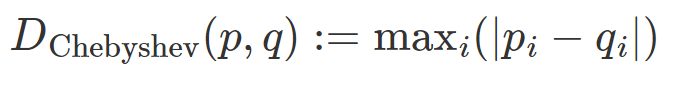

In [6]:
def chebychef_distance(x,y):
      return np.max(np.absolute(np.array(x) - np.array(y)))

print("distance:",chebychef_distance(a,b) )

# spatial.distance.chebyshev(a, b)

distance: 6


### Consine Distance
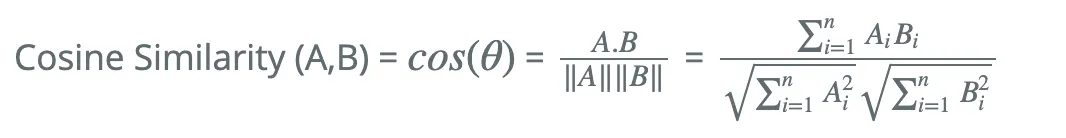

In [7]:
def square_rooted(x):
   return round(sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)

similarity = cosine_similarity(a, b)
distance = 1- similarity
print( "similarity:{}\ndistance:{:4f}".format(similarity, distance) )

# spatial.distance.cosine(a, b)

similarity:0.747
distance:0.253000


### Jaccard Distance 雅卡爾指數
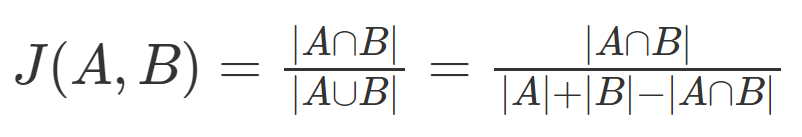

In [8]:
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)

similarity = jaccard_similarity(a, b)
distance = 1- similarity
print( "similarity:{}\ndistance:{:4f}".format(similarity, distance) )

# spatial.distance.jaccard(a, b)

similarity:0.8333333333333334
distance:0.166667


### 其他距離函數
官網:https://docs.scipy.org/doc/scipy-0.17.1/reference/spatial.distance.html
### 函數參考
https://ashukumar27.medium.com/similarity-functions-in-python-aa6dfe721035

# Normorlize 正規化
算法庫-> pip install scikit-learn  
資料庫-> pip install pandas  
  
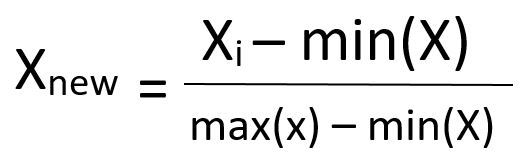

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 載入CSV檔
data = pd.read_csv('dataset.csv')
print(data,"\n")

# 擷取特徵
num_features = ['feature1', 'feature2', 'feature3']
X = data[num_features]

# 平均值和標準差 StandardScaler (高斯分布)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized,"\n")

# 最小最大值標準化 MinMax
scaler = MinMaxScaler(feature_range=(0,1))
X_normalized = scaler.fit_transform(X)
print(X_normalized)

   feature1  feature2  feature3  feature4
0       100         0         1         2
1       101         3         4         5
2       102         6         7         8
3       103         9        10        11
4       104        12        13        14 

[[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]] 

[[0.   0.   0.  ]
 [0.25 0.25 0.25]
 [0.5  0.5  0.5 ]
 [0.75 0.75 0.75]
 [1.   1.   1.  ]]


SKlearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing  
其他: https://ithelp.ithome.com.tw/articles/10240494  
https://pieriantraining.com/tutorial-how-to-normalize-data-in-python/